# **Twitter US Airline Sentiment **

# Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# Objective


Our  objective is review the tweets and based on available data do text pre-processing and  build a classification  model to classify tweets in positive , negative and neutral category .


# Data Description:

 **Twitter DataSet**

The dataset has the following columns:

1. tweet_id                                                           
2. airline_sentiment                                               
3. airline_sentiment_confidence                               
4. negativereason                                                   
5. negativereason_confidence                                    
6. airline                                                                    
7. airline_sentiment_gold                                              
8. name     
9. negativereason_gold 
10. retweet_count
11. text
12. tweet_coord
13. tweet_created
14. tweet_location 
15. user_timezone

#  Import Libraries

In [68]:
import pandas as pd 
pd.set_option('max_colwidth',None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## TO display Images 
from PIL import Image

## To remove accented character 
!pip install unidecode
import unidecode 

## To correct spelling 
!pip install autocorrect 

from autocorrect import Speller 

!pip install contractions
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup 

In [2]:
## Importing NLTK Library 

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from wordcloud  import WordCloud,STOPWORDS,ImageColorGenerator

## Importing Stemmers 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer


# For using Lemmatization 
from nltk.stem import WordNetLemmatizer

 ## Used in Tokenization 

from nltk.tokenize import word_tokenize,sent_tokenize


In [4]:
## Importing  Spacy 

import spacy 

nlp = spacy.load('en_core_web_sm')  # Loading the envrionment config

# Used in tokenization
from spacy.lang.en import English
en_nlp = English()

In [5]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from sklearn.model_selection import cross_val_score

# Loading Data Set

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data =pd.read_csv('/content/drive/MyDrive/Project9- TwitterSentimentAnalysisForAirLines/Tweets.csv')

# Data OverView

In [8]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
data.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

We can se we have total 14640 observations and have 15 columns which contains various infomartion like tweet , airline , name of person tweeting , time , date and sentiment of the tweet .

In [11]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


Looking at data distribution we can see that there are  lot of null values but there are no null values in text or ,senntiment which is our main area of interest .

Checking For Duplicates 

In [12]:
data.duplicated().sum()

36

We have 36 duplicates so let us drop duplicate data and reset index .

In [13]:
data=data.drop_duplicates(keep='first')

In [14]:
data = data.reset_index(drop = True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

We could see many columns have null data . But we are interested in  airline name  ,airline sentiment and text for which there is no missing data . Post EDA we will drop other unnecessary columns.

# Exploratory Data Analysis 

In [17]:
print(data['airline'].value_counts())

United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


In [18]:
print(data['airline_sentiment'].value_counts())

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


Looking at data we could see  data is  imbalanced as we have manjority of tweets for negative sentiment as compared to neutral and positive sentiment .

<Axes: xlabel='airline', ylabel='count'>

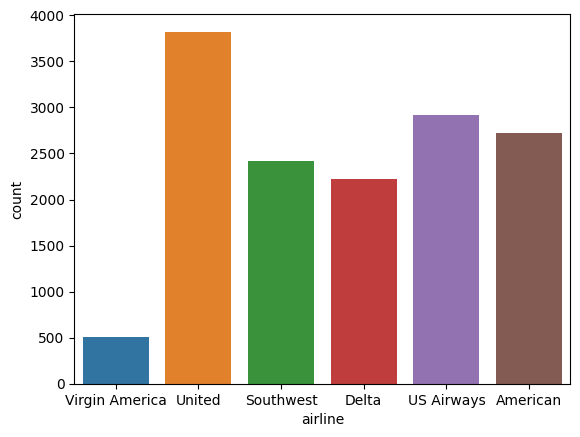

In [19]:
sns.countplot(x='airline',data=data)

We can see that maximum tweets are  for United , folllowed by Us Airways and American ,South west and delta .
There are very few tweets for Virgin america.

<Axes: xlabel='airline', ylabel='count'>

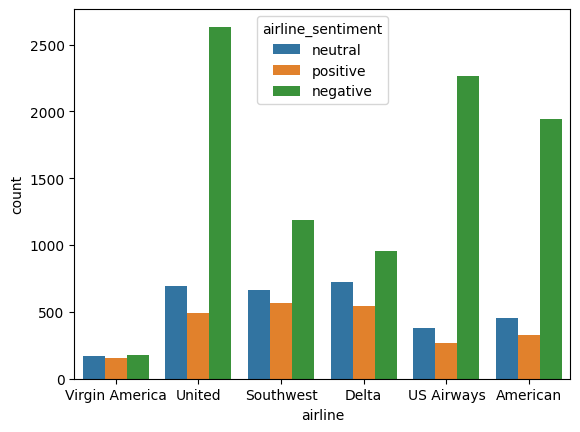

In [20]:
sns.countplot(x='airline',data=data ,hue='airline_sentiment')

**Observations**
1. For all Airlines negative tweets are much higher 
2. For United total number of tweets are also highest and total number of negative tweets are also highest .
3.  For  Virgin America , SouthWest and delta negative tweets are much less as compared to other airlines .

<Axes: xlabel='count', ylabel='negativereason'>

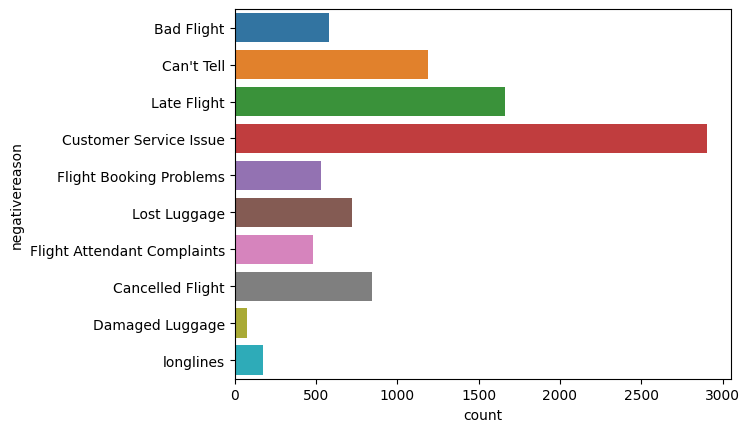

In [21]:
sns.countplot(y='negativereason',data=data[data['airline_sentiment']=='negative'] )

We can see that maximum negative reasons are for customer service . Let us how this distribution looks across airlines 

<Axes: xlabel='airline', ylabel='count'>

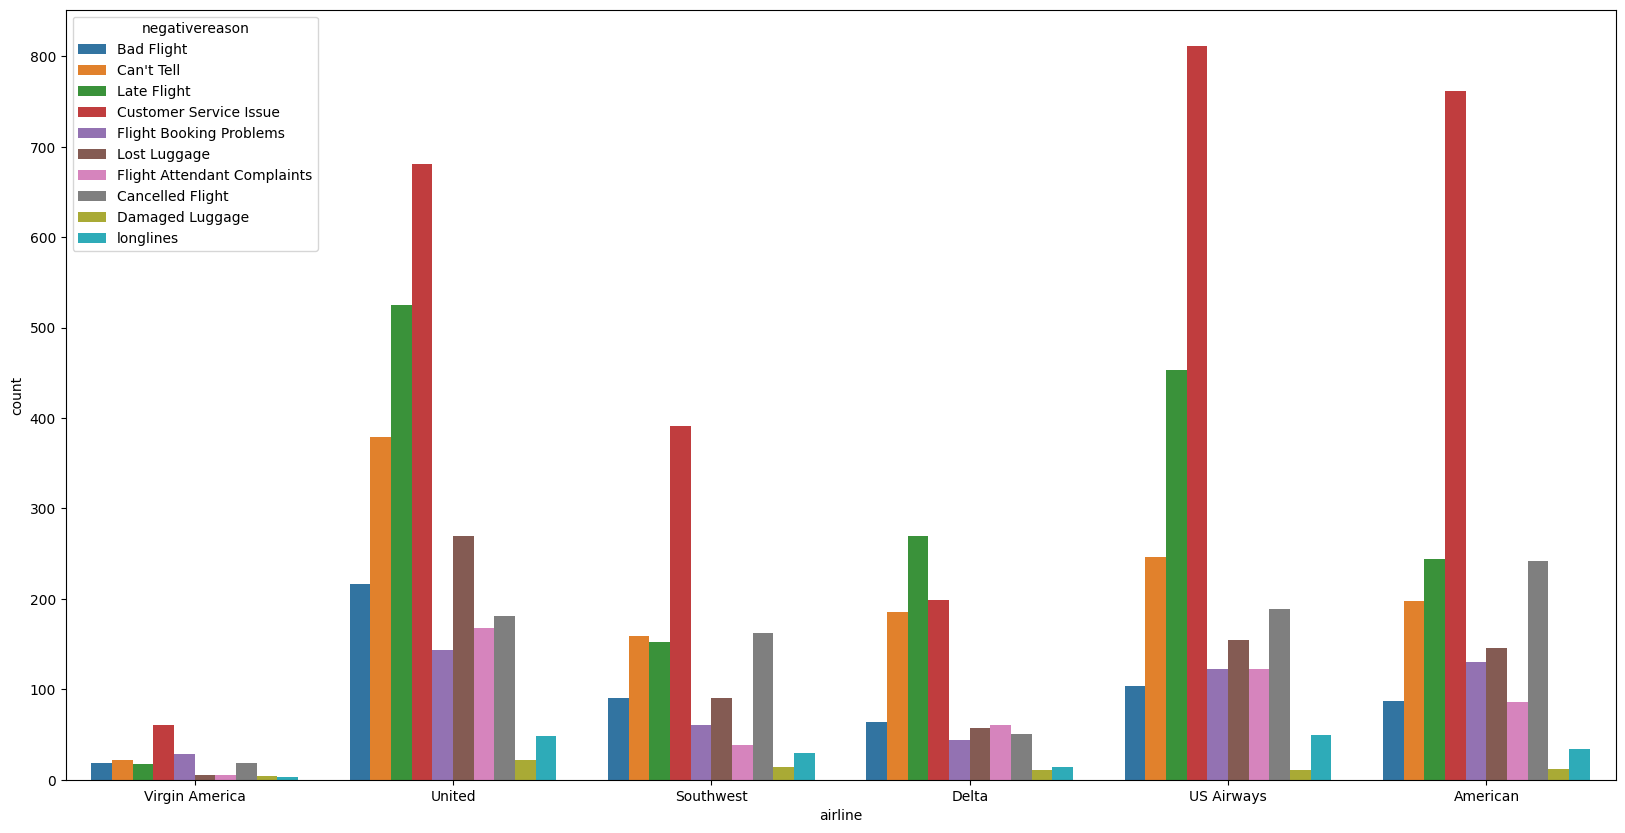

In [22]:
 %matplotlib inline
 plt.rcParams['figure.figsize']=20,10
 sns.countplot(x='airline',data=data[data['airline_sentiment']=='negative'] ,hue='negativereason' )

<Axes: xlabel='negativereason', ylabel='count'>

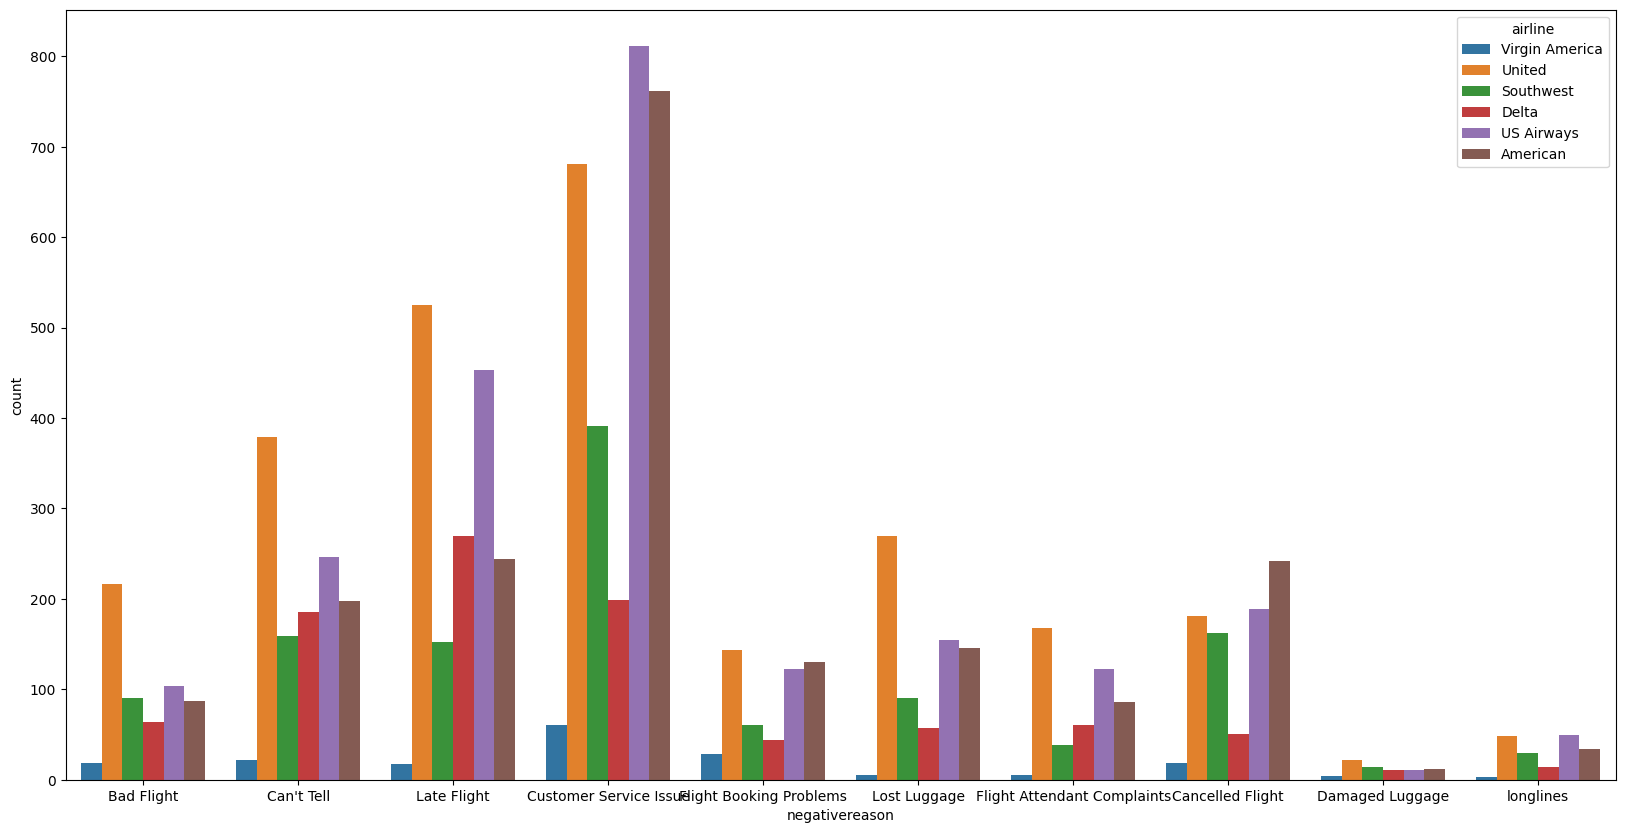

In [23]:
 %matplotlib inline
 plt.rcParams['figure.figsize']=20,10
 sns.countplot(x='negativereason',data=data[data['airline_sentiment']=='negative'] ,hue='airline' )

We can see that For all air lines main reason for negative comments is customer service .Let us check some Negative tweets .

In [24]:
data['text'][data['airline_sentiment']=='negative']

3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
5                      @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
15                                                                                                                @VirginAmerica SFO-PDX schedule is still MIA.
17                    @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!
                                                                                  ...                                                                          
14595                                   

# Word Cloud

A word cloud (also known as a tag cloud or text cloud) is a visual representation of text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns

Let us plot word cloud for negative and positve sentiments to see the pattern.

# Word Cloud For Negative  Sentiments 

In [25]:
# Creating word cloud for negative reviews

negative_reviews = data[data['airline_sentiment'] == 'negative']

words = ' '.join(negative_reviews['text'])

cleaned_word = " ".join([word for word in words.split()])

In [26]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

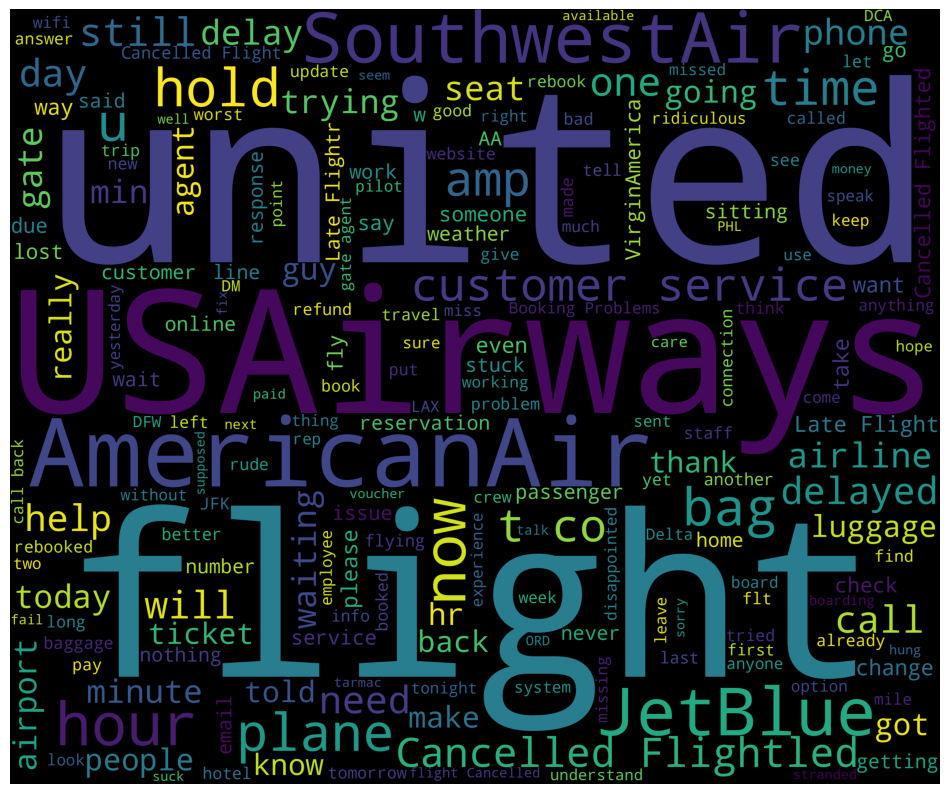

In [27]:
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

For negative sentiments we can see that  united and  USa air ways which have maximum negative feedback are  shown . Also we could see words like missed , alte last delay .

## Word Cloud For Positive Sentiments 

In [28]:
positive_words = data[data['airline_sentiment']=='positive']

In [29]:
words=''.join(positive_words['text'])

In [30]:
cleaned_positive_word=" ".join([word for word in words.split()])

In [31]:
postivewordCloud= WordCloud(stopwords=STOPWORDS,background_color='black',
                            width=3000,height=2500).generate(cleaned_positive_word)

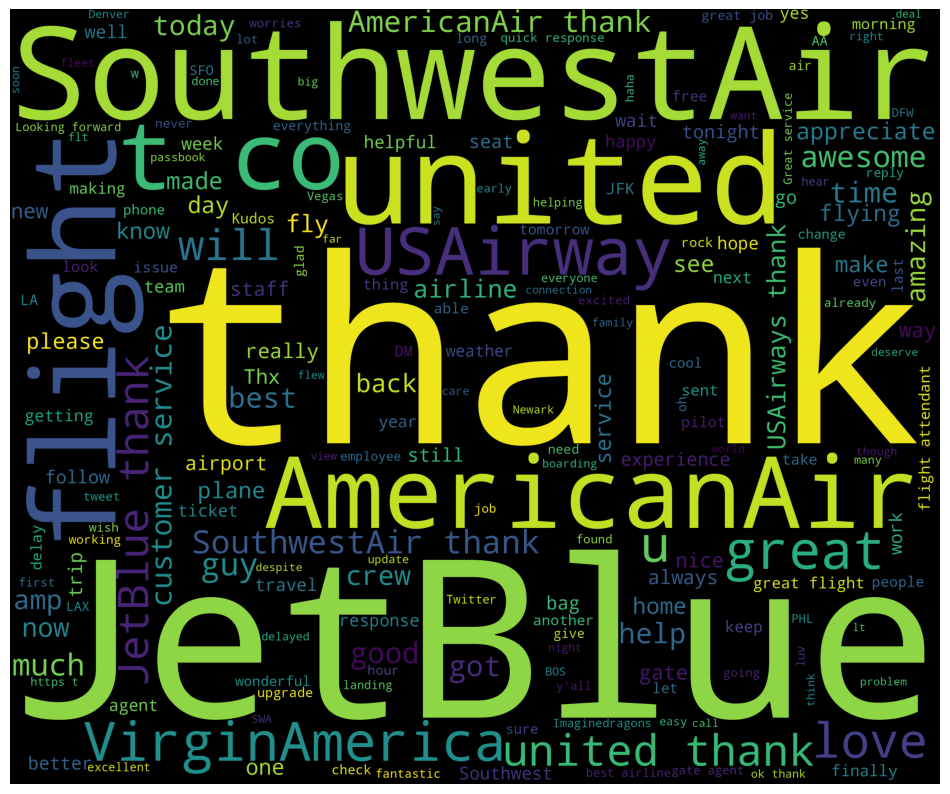

In [32]:
plt.figure(1,figsize=(12,12))
plt.imshow(postivewordCloud)
plt.axis('off')
plt.show()

Looking at the word cloud we can see for Positive review Jet blue m thanks , follow , happy words are coming . But here also there are  American Air and United are comming .

##  Removing Unnecessary columns from Dataset 

We are interestst in  Tweet text and their sentiment type ( positive , negative or neutral ) .

 Hence we will drop remaining other columns .

In [33]:
datacopy=data.copy()

In [34]:
#data=datacopy

In [35]:
data = data.loc[:, ['airline_sentiment', 'text']]

In [36]:
#data = data.reset_index(drop = True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14604 non-null  object
 1   text               14604 non-null  object
dtypes: object(2)
memory usage: 228.3+ KB


# Text PreProcessing


Pre-process the text data for classification  , we will mainly do following tasks
1.  Html tag removal.
2.  Tokenization. 
3.  Remove the numbers.
4.  Removal of Special Characters and Punctuations. 
5.  Removal of stopwords 
6.  Conversion to lowercase. 
7.  Lemmatize or stemming. 

Let us write to Functions to achieve  above requirement and apply that on our data set and we will  compare how  before and after text looks like .

In [38]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

In [39]:
#expand the contractions to replace conrtactations such as didn't with didn not etc  
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [40]:
## calling contractions and html removing function via single fucntion 
def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    return text


In [41]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))


<ipython-input-38-bf78bcb390de>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


##  Removing accented character from text

Accents are special string characters generally adapted from other languages. They are not considered a major part of English.
By using the unidecode library, we can transliterate any unicode string into the closest possible representation in ASCII text.

In [42]:
cleantext=[]

for i in range(data.shape[0]):
   t = data['text'][i].split()
   new_text=[unidecode.unidecode(word)for word in t]
   new_text=' '.join(new_text)
   cleantext.append(new_text)
data['cleaned_text']=cleantext


In [43]:
data.loc[0:3,['text','cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"


## Removing special characters from the text using Regular Expression 

Here we will exclude all the characters except A-Z , a-z , 0-9  .

In [44]:
# importing regex library
import re


# defining an empty list
text = []

# Specifying the pattern for regex to match a string of characters that are not a letters or numbers 
# regex will look for alphabets A to Z, a to z, and numbers 0 to 9
pattern = '[^A-Za-z0-9]+'

# looping over each message in the data
for i in range(data.shape[0]):

    words = data['cleaned_text'][i].split() # splitting text into separate words
    new_text = ''.join(re.sub(pattern, ' ', data['cleaned_text'][i])) # finding the pattern and using the join() function to retrive the original text
    text.append(new_text) # append the new_text to empty list text
    
data['cleaned_text'] = text  

In [45]:
data.loc[0:3,['text','cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus you ve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didn t today Must mean I need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",VirginAmerica it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse


# Converting Text to Lowercase

* **Lowercasing is an important text preprocessing technique.** The goal is to change the input text's case so that the words "text," "Text," and "TEXT" are all treated equally. Strings in Python are of course case-sensitive, so Python will not automatically do this for us.
* Lowercasing helps reduce duplication and obtain accurate counts - it is hence an important part of various **"feature extraction"** approaches for text data.

In [46]:
text=[]

for i in range(data.shape[0]):
   new_text=data['cleaned_text'][i].lower()
   text.append(new_text)
data['cleaned_text'] = text


## Stipping Extra Spaces

In [47]:
text=[]

for i in range(data.shape[0]):
  new_text=data['cleaned_text'][i].strip() 
  text.append(new_text)

data['cleaned_text']=text

In [48]:
print("Before stripping the text data:",data['text'][1])
print("After stripping the text data:",data['cleaned_text'][1])

Before stripping the text data: @VirginAmerica plus you've added commercials to the experience... tacky.
After stripping the text data: virginamerica plus you ve added commercials to the experience tacky


# Stop word removal 

* The simple idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus. Pronouns and articles are typically categorized as stop words.

* To implement this, we have two Python libraries that are built to be used for NLP operations. Let's have a look at them and we'll implement them through both libraries.

In [49]:
text = []

for i in range(data.shape[0]):
    
    word = data['cleaned_text'][i].split() # splitting text into separate words 
    # removing the english language stopwords from the messages
    new_text = [w for w in word if not w in stopwords.words('english')] 
    new_text = ' '.join(new_text) #retriving the original text
    text.append(new_text) # 
    
data['NLTK_nostopwords_text'] = text 


In [50]:
data.loc[0:3,['cleaned_text','NLTK_nostopwords_text']]

,cleaned_text,NLTK_nostopwords_text
0,virginamerica what dhepburn said,virginamerica dhepburn said
1,virginamerica plus you ve added commercials to the experience tacky,virginamerica plus added commercials experience tacky
2,virginamerica i didn t today must mean i need to take another trip,virginamerica today must mean need take another trip
3,virginamerica it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse


In [51]:
# Implemenation using NLTK

# initiating Lemmatizer available in NLTK library
lemmatizer = WordNetLemmatizer()

# defining empty list for lemmatizer output
lemma = []

# looping over each message in the data
for i in range(data.shape[0]):
  text = data['NLTK_nostopwords_text'][i].split()  # splitting text into separate words 
  new_text = [lemmatizer.lemmatize(word) for word in text] # perfoming lemmatization on every word of a mesaage
  new_text = ' '.join(new_text) # retriving the original text
  lemma.append(new_text) # append the text with base form of words in a message to empty list text

data['NLTK_nostopwords_text'] = lemma

In [52]:
data.loc[0:3,['text','cleaned_text','NLTK_nostopwords_text']]

,text,cleaned_text,NLTK_nostopwords_text
0,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,virginamerica plus you ve added commercials to the experience tacky,virginamerica plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,virginamerica i didn t today must mean i need to take another trip,virginamerica today must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse


For Vectorization , we will  use output from Lmitization step i.e  column NLTK_nostopwords_text'

# Vectorization And Model Building

# Approach
1. We will use both Bag of words and  TF-IDF method for vectorization and will build models using them .
2. We will compare performances of both models and then decide which one to choose 

##**Bag of Words (CountVectorizer)**

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['NLTK_nostopwords_text'])

data_features = data_features.toarray()

In [54]:
data_features.shape 

(14604, 500)

In [55]:
X= data_features

In [56]:
Y = data['airline_sentiment'].map({'neutral':0,'negative':1,'positive':2})

In [59]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42 )

In [60]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [62]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

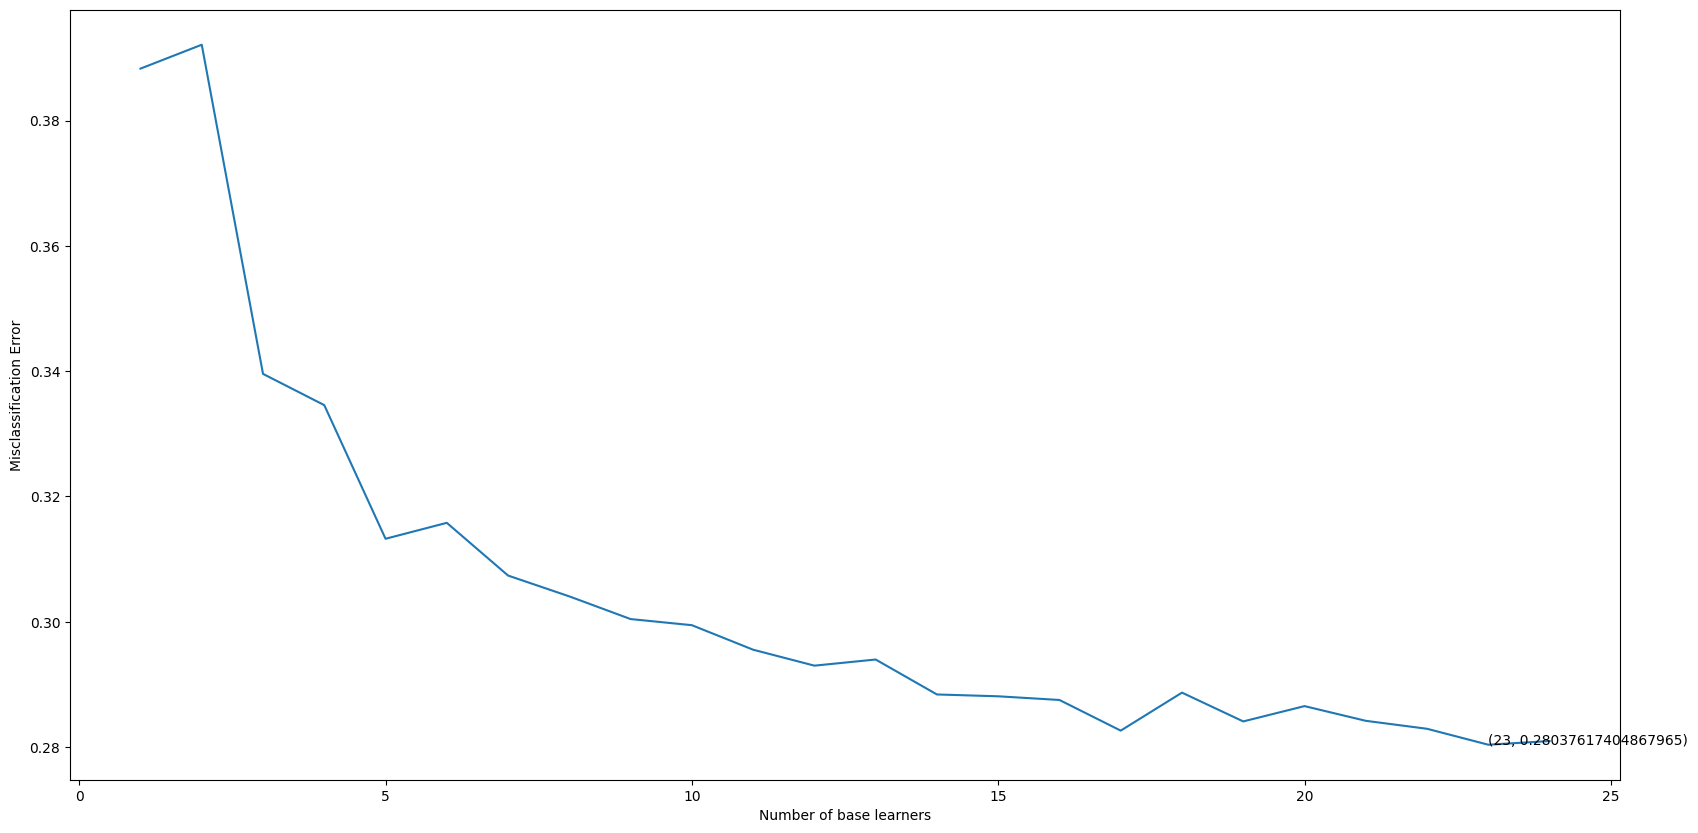

In [63]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [64]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       885
           1       0.82      0.85      0.84      2796
           2       0.65      0.59      0.62       701

    accuracy                           0.74      4382
   macro avg       0.66      0.64      0.65      4382
weighted avg       0.73      0.74      0.73      4382

Accuracy of the model is :  0.7361935189411227


[[ 433  346  106]
 [ 300 2381  115]
 [ 118  171  412]]


<Axes: >

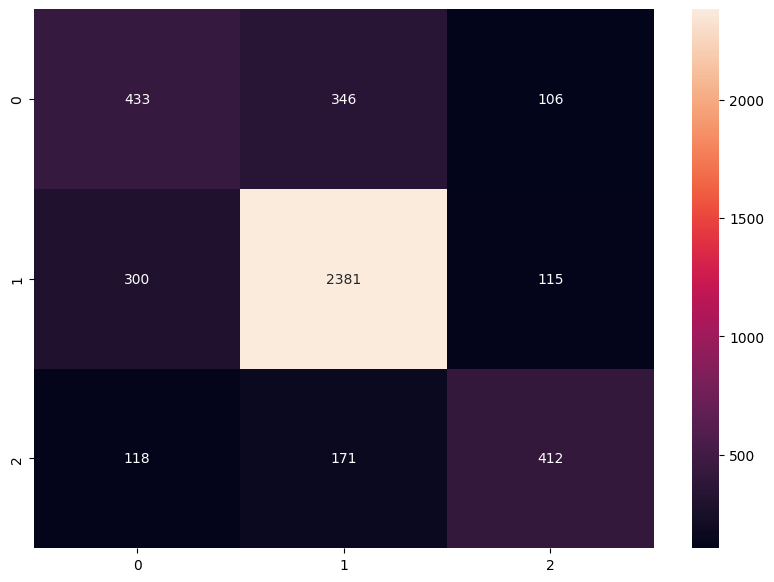

In [65]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Observation

1. We can see accurancy of model with bacg of words is 73% 
2. Looking at confusion matrix we can see  there is more misclassificaition between neutral and negative tweets .


Let us check 40 important feature  indetified by bag of verctors model 

thank,thanks,hour,jetblue,flight,great,usairways,united,southwestair,customer,http,americanair,love,bag,cancelled,get,virginamerica,time,delayed,hold,awesome,amazing,help,co,airline,dm,good,would,plane,guy,please,one,call,need,day,today,best,service,amp,still,
 
 


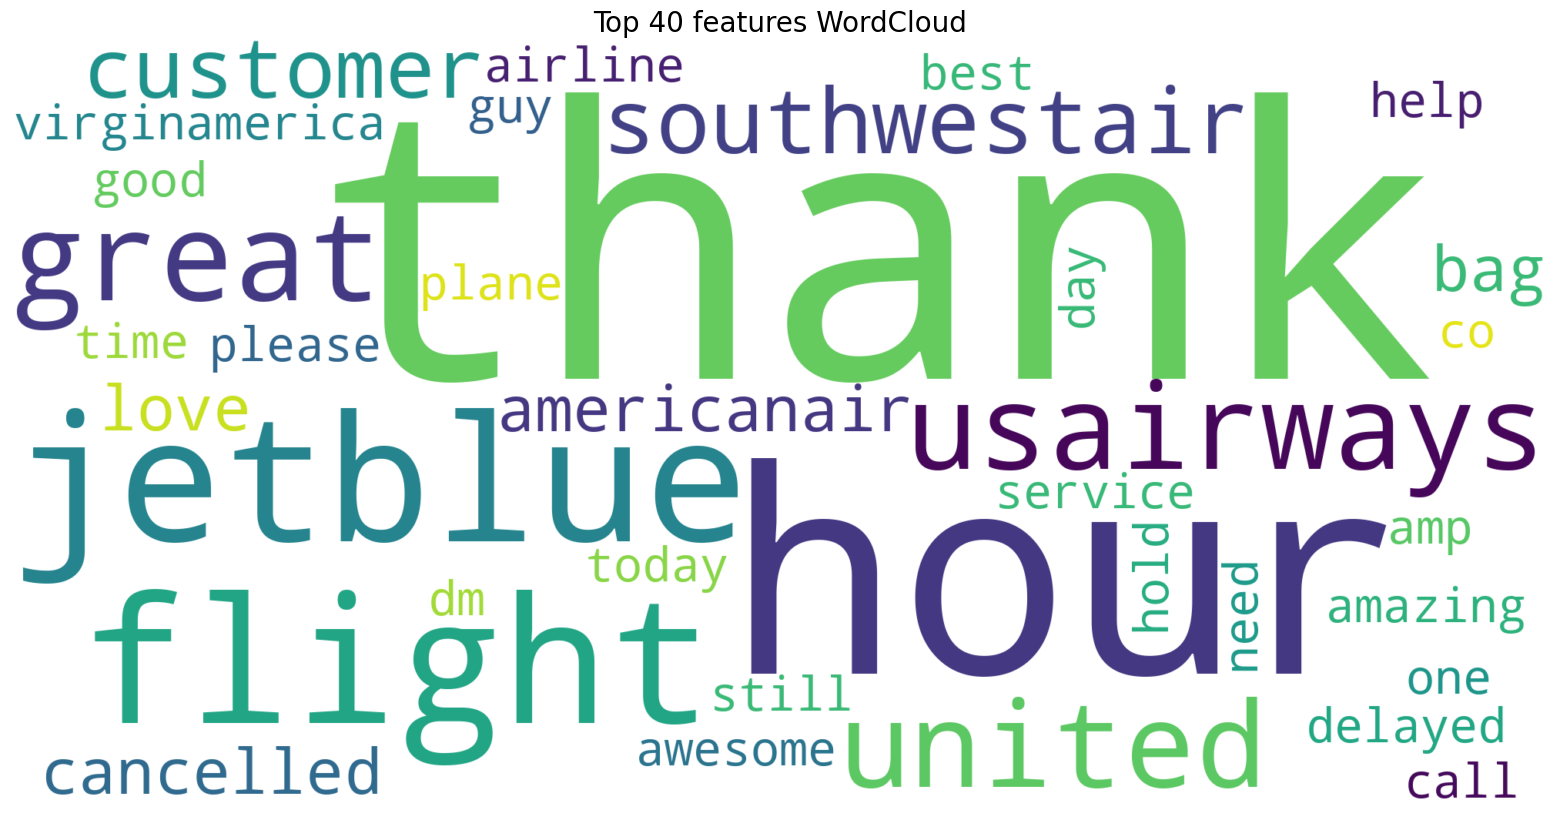

In [69]:
all_features = Count_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# Observation

Looking at importanant feature we can see both positive and negative words are part of top 40 positve words like  thanks ,great , awesome , love ,best ,amazing  and air lines name and negative words like hold, delayed , cancelled .But we could see there are more positive words in top 40 than negative words . 

## **Term Frequency (TF)- Inverse Document Frequency (IDF)**

Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words. We will use  TfIDFVectorize to convert text into number 

In [70]:
tfidf_vect=TfidfVectorizer(max_features=500)
data_features_tf_idf=tfidf_vect.fit_transform(data['NLTK_nostopwords_text'])
data_features_tf_idf=data_features_tf_idf.toarray()

In [71]:
data_features_tf_idf.shape

(14604, 500)

In [72]:
X=data_features_tf_idf

In [73]:
Y = data['airline_sentiment'].map({'neutral':0,'negative':1,'positive':2})

In [74]:
X_train,X_test,y_train,t_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [75]:
base_ln= [x for x in range(1,25)]

In [76]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

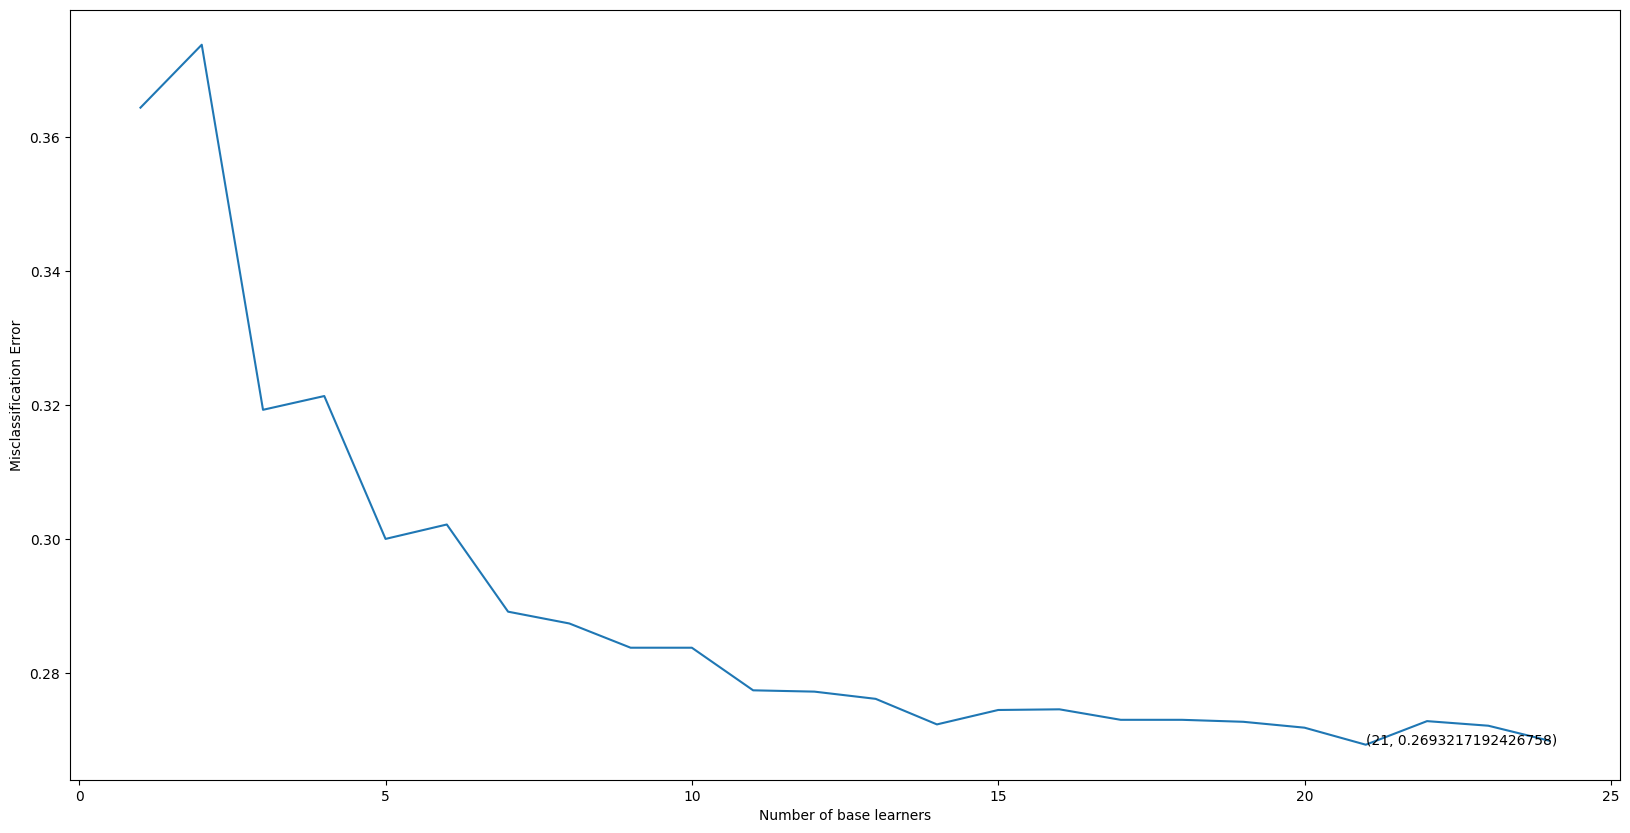

In [77]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [78]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.56      0.40      0.47       885
           1       0.80      0.91      0.85      2796
           2       0.68      0.54      0.60       701

    accuracy                           0.75      4382
   macro avg       0.68      0.62      0.64      4382
weighted avg       0.73      0.75      0.73      4382

Accuracy of the model is :  0.7480602464628023


[[ 357  424  104]
 [ 179 2539   78]
 [ 106  213  382]]


<Axes: >

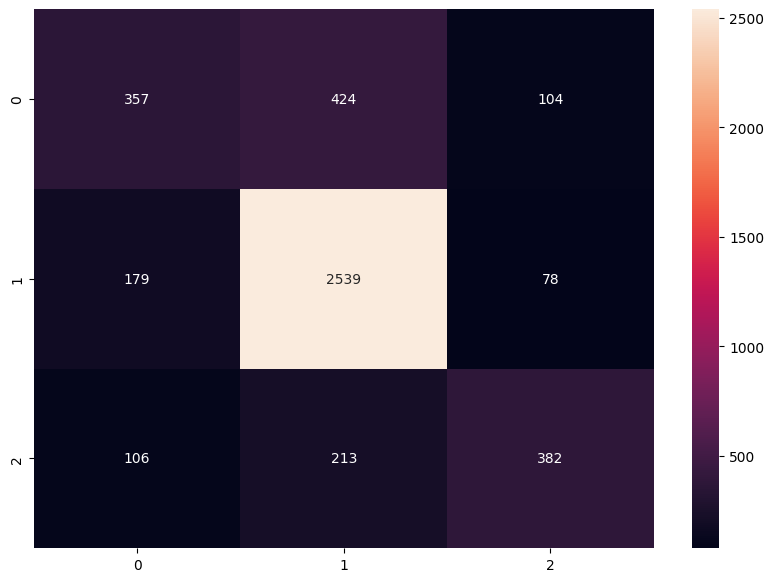

In [79]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#Observation

We can see that model accuracy is nearly 75% which is on same lines as of Bag of words  . 
FOr negative sentiments this model has done good job but this model  has misclassified many positive  and neutral  sentiments as negative words .

Let  us check top 40 features identified by this model 

thanks,thank,southwestair,jetblue,united,americanair,usairways,flight,http,hour,great,co,virginamerica,love,cancelled,dm,get,amazing,customer,bag,hold,good,best,delayed,awesome,time,service,please,help,would,plane,airline,guy,need,delay,fly,much,today,yes,know,
 
 


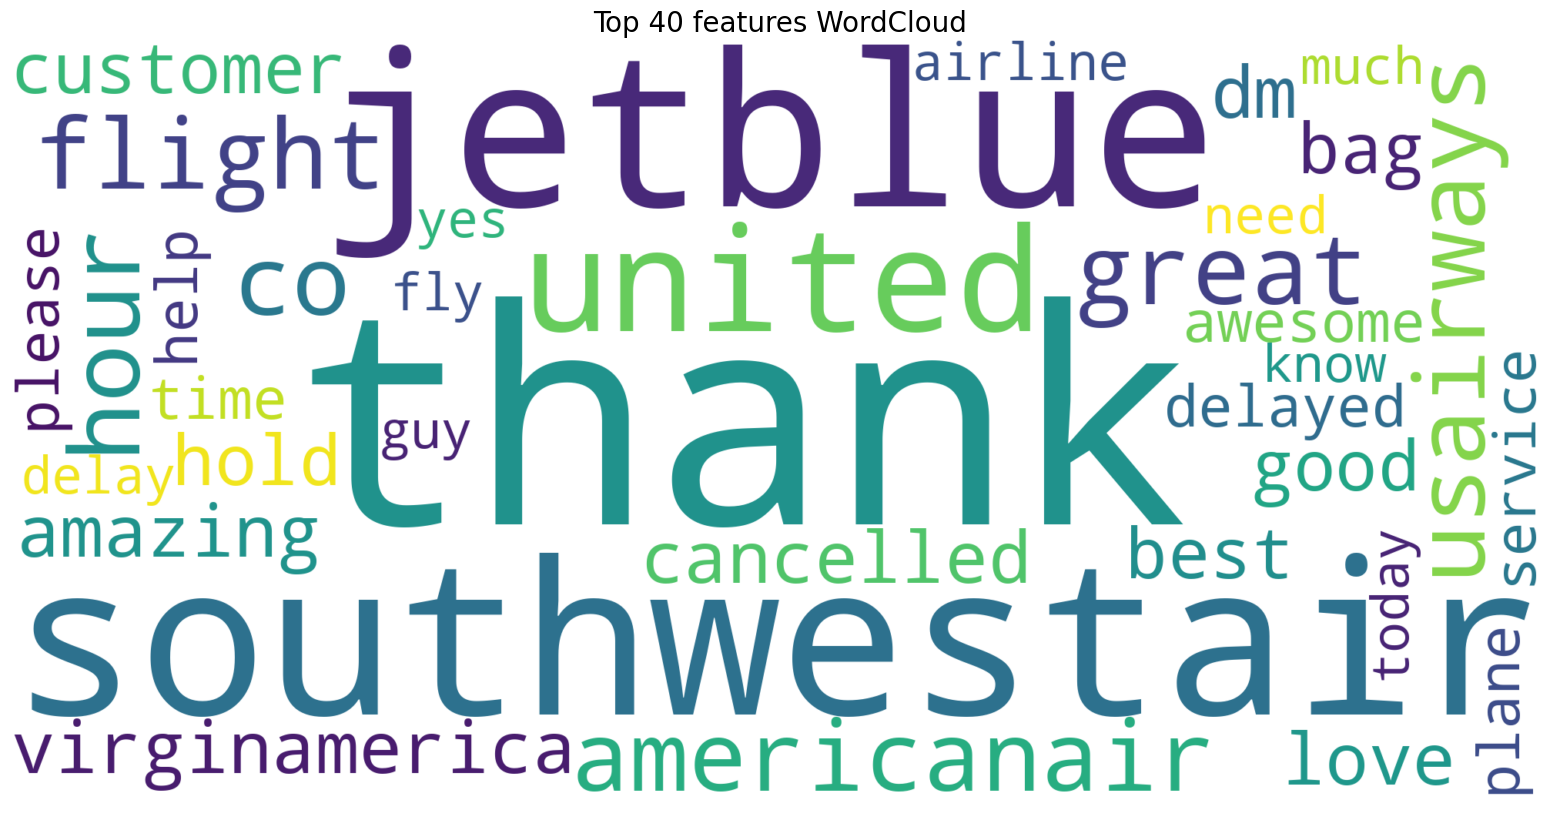

In [80]:
all_features =tfidf_vect.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(12, 10), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

We can see most top 40 words are same in both models and top 40  words contain more  positive words but both models contains workds like delayed ,cancelled , customer service for negative sentiments .

#  Comparing Accuracy of   Bag of Vector and TF IDF 

In [81]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head(10)

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,0,0,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,0,2,2
7,0,0,1
8,1,1,1
9,0,1,1


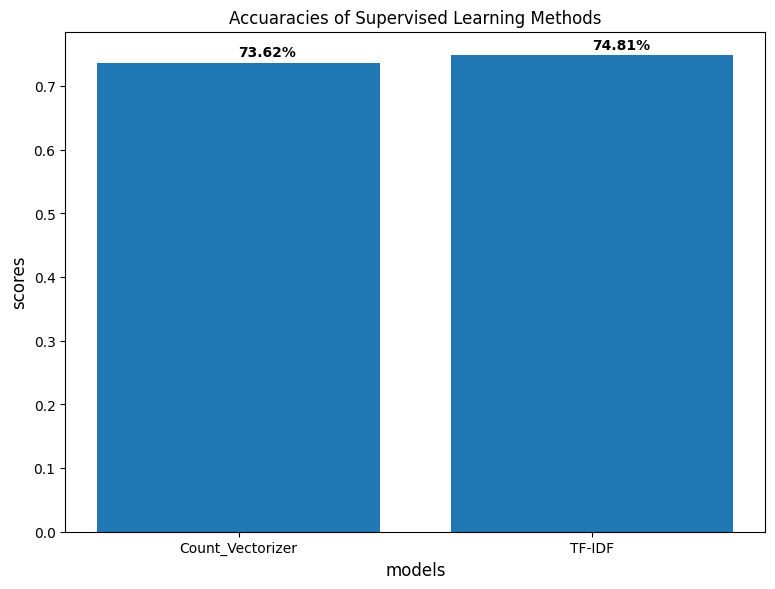

In [83]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

# Conclusion and  Recommandation

1. We can see that Accurancy of Model developed using Bag of Words vecrorizer is and model developed using TF- IDF  is almost but TF- IDF gives little more accuracy than  Count Vectorizer .
2. We could see that both models  have misclassfied many positive and neutral tweets as negative tweets . This is due to the fact that data set is imbalanced and we had more negative tweets for training as compared to positive and  neutral tweets .
3. Looking at analysis we could see all  Airlines needs to pay more attention to customer service . In events like delayed or cancelled or bag mismatch there are tweets and that Airlines needs to handle  and improve their customer response in these areas.
4. There are more customer service  negative feedbck for US airways , United and  American Airways and  this feedback should be used to improve their customer service department . 
5. There are more positive feedbacks for southwest and Jet Blues and this impormantion they can use in their Airline promotions .